In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
import warnings
warnings.simplefilter(action = 'ignore')

In [3]:
data = pd.read_csv("D:\jupyter\diabetes.csv")
#读取数据值
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = pd.DataFrame(data)
#将数据转化为DateDrame
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.describe(include='all')
#描述统计

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()
#检查是否有数据值缺失

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dropna(how = 'any')
#s删除具有空值的行或列（any）axis=0则是按行删除，=1则是按列删除

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()
#输出数据集的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


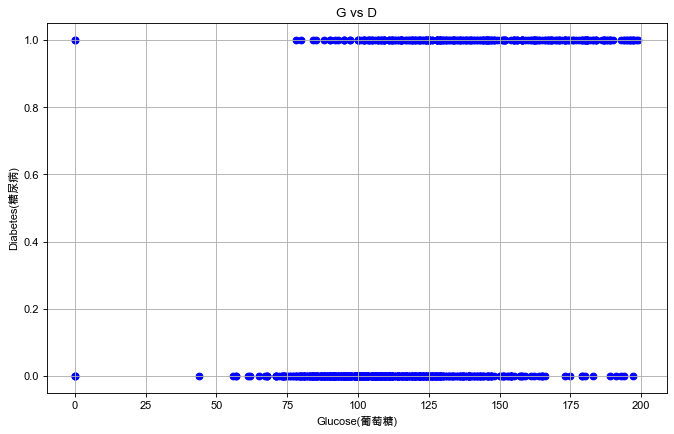

In [9]:
plt.rcParams['font.family'] = ['Arial Unicode MS','Microsoft YaHei','SimHei','sans-serif']
#字体设置
plt.rcParams['axes.unicode_minus'] = False
#字符显示
plt.figure(figsize = (10,6),dpi = 80)
plt.scatter(df['Glucose'],df['Outcome'],color = 'blue')
#设置参数x和y以及散点颜色
plt.xlabel('Glucose(葡萄糖)')
# x轴标签
plt.ylabel('Diabetes(糖尿病)')
#y轴标签
plt.title('G vs D')
plt.grid()
#显示网格线
plt.show()
#噪声散点图

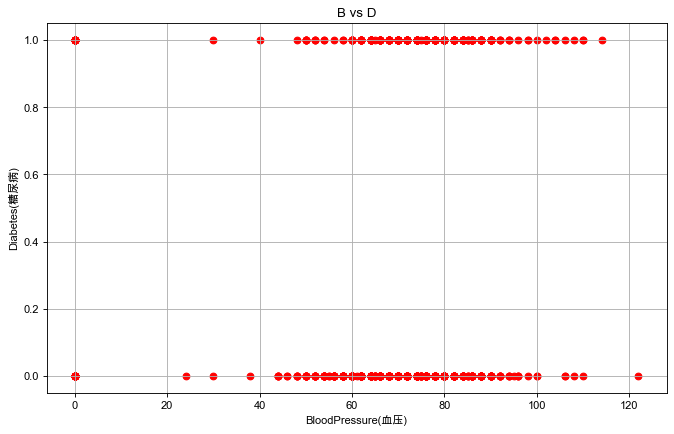

In [10]:
plt.figure(figsize = (10,6),dpi = 80)
plt.scatter(df['BloodPressure'],df['Outcome'],color = 'red')
plt.xlabel('BloodPressure(血压)')
plt.ylabel('Diabetes(糖尿病)')
plt.title('B vs D')
plt.grid()
plt.show()

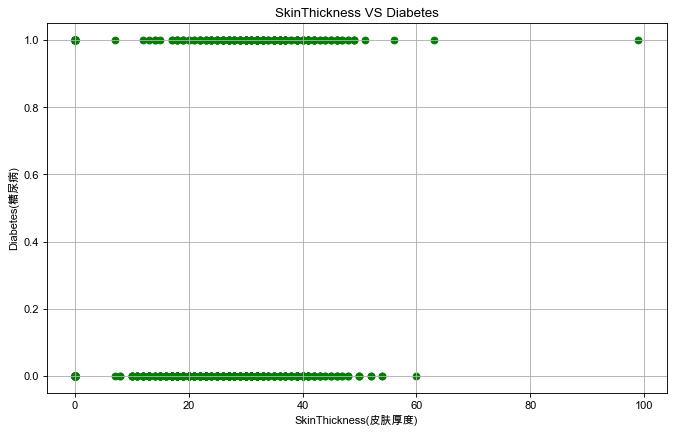

In [11]:
plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['SkinThickness'] , df['Outcome'] , color = 'green')
plt.xlabel ('SkinThickness(皮肤厚度)')
plt.ylabel ('Diabetes(糖尿病)')
plt.title ('SkinThickness VS Diabetes')
plt.grid()
plt.show ()

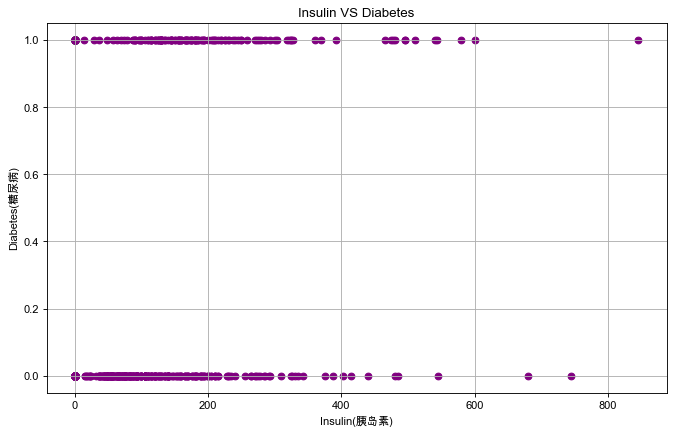

In [12]:
plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['Insulin'] , df['Outcome'] , color = 'purple')
plt.xlabel ('Insulin(胰岛素)')
plt.ylabel ('Diabetes(糖尿病)')
plt.title ('Insulin VS Diabetes')
plt.grid()
plt.show ()

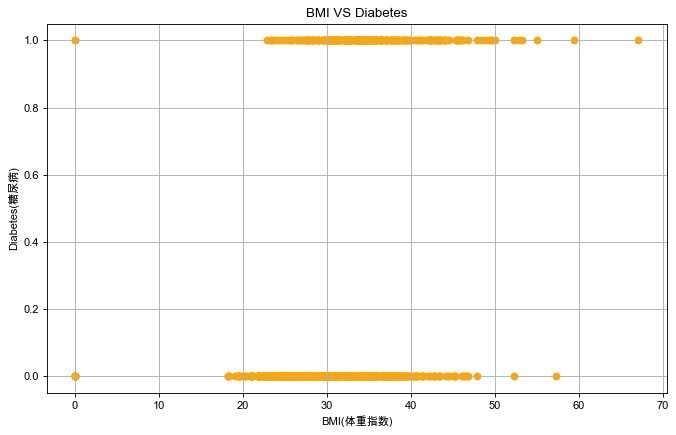

In [13]:
plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['BMI'] , df['Outcome'] , color = 'orange')
plt.xlabel ('BMI(体重指数)')
plt.ylabel ('Diabetes(糖尿病)')
plt.title ('BMI VS Diabetes')
plt.grid()
plt.show ()

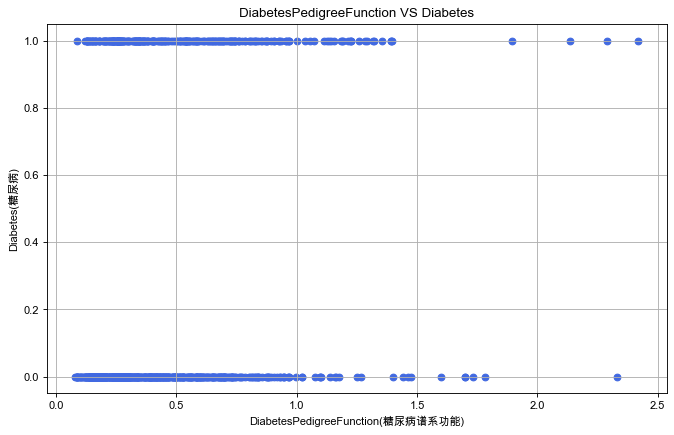

In [14]:
plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['DiabetesPedigreeFunction'] , df['Outcome'] , color = 'royalblue')
plt.xlabel ('DiabetesPedigreeFunction(糖尿病谱系功能)')
plt.ylabel ('Diabetes(糖尿病)')
plt.title ('DiabetesPedigreeFunction VS Diabetes')
plt.grid()
plt.show ()

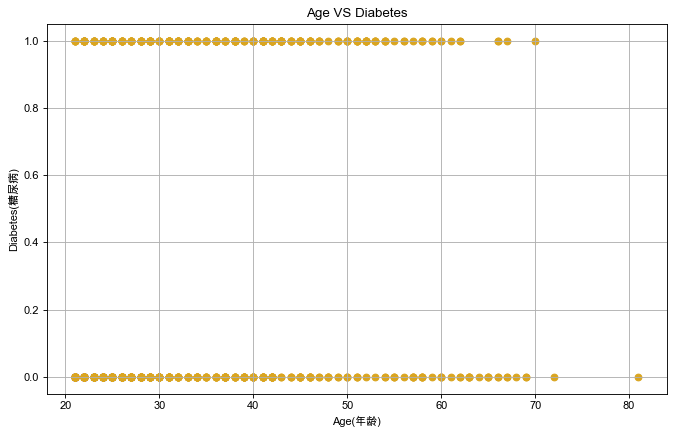

In [15]:
plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['Age'] , df['Outcome'] , color = 'goldenrod')
plt.xlabel ('Age(年龄)')
plt.ylabel ('Diabetes(糖尿病)')
plt.title ('Age VS Diabetes')
plt.grid()
plt.show ()

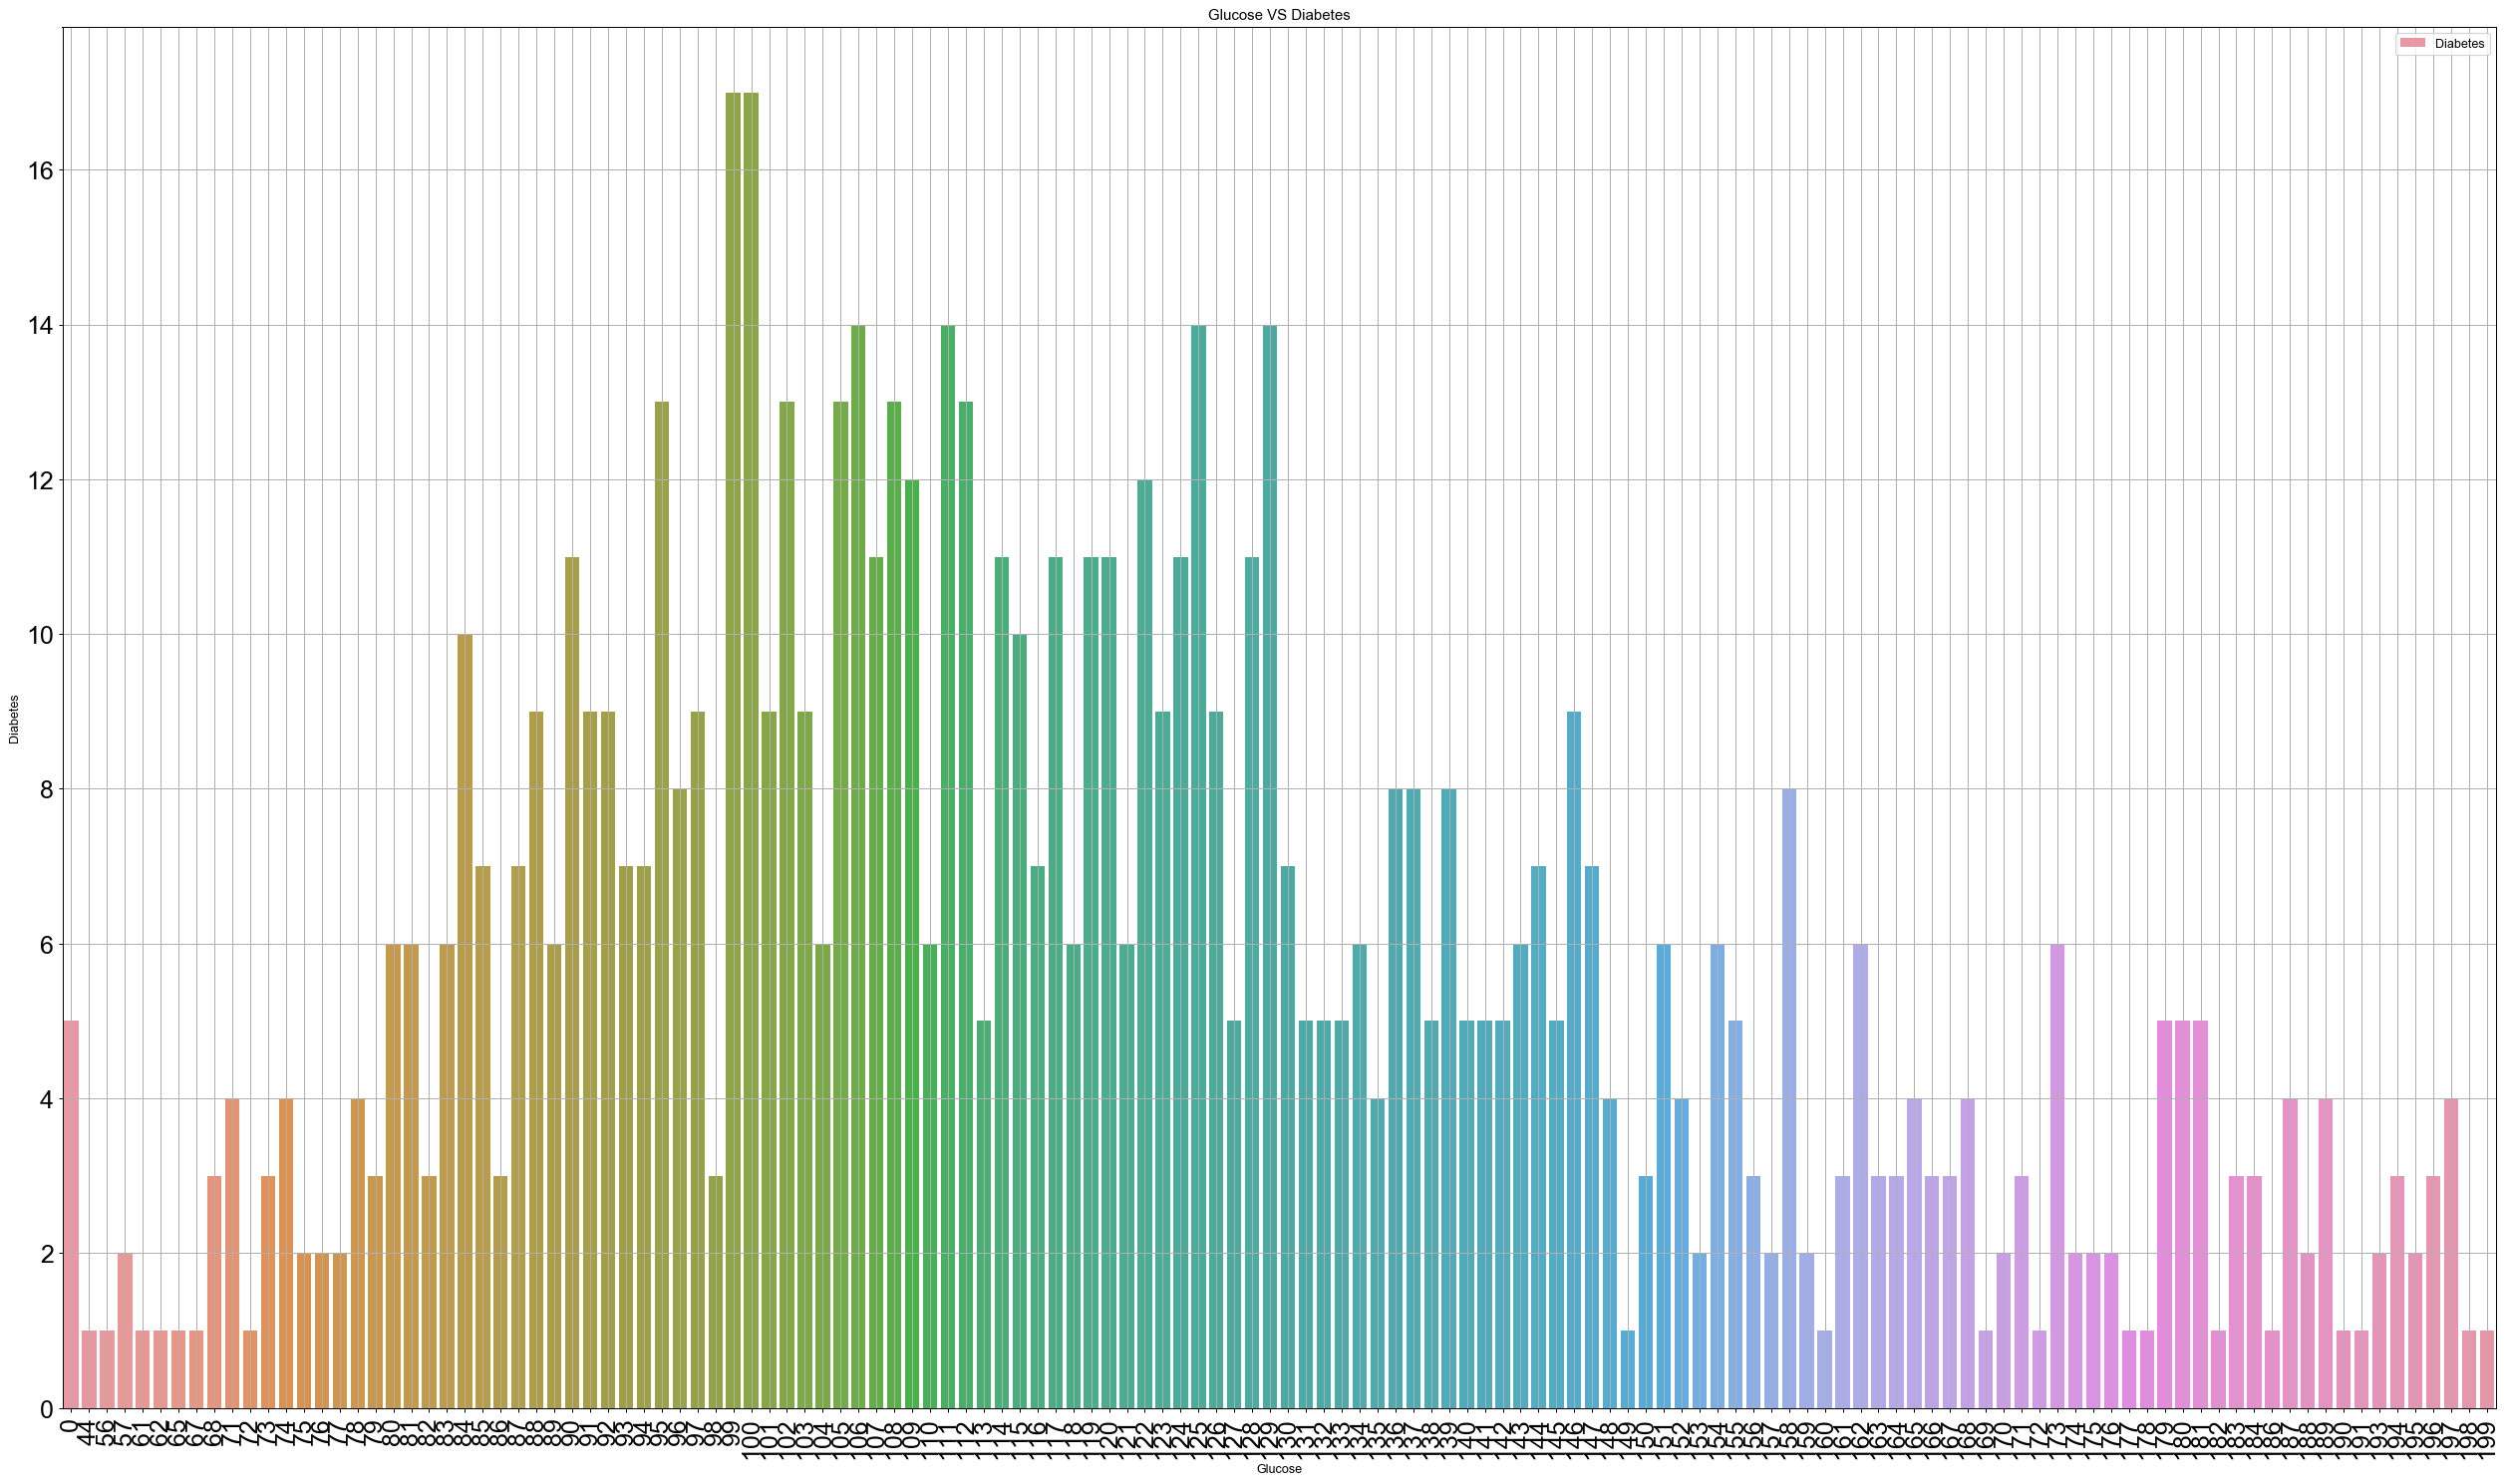

In [16]:
plt.figure (figsize = (35,20) , dpi = 90)
ax = sns.countplot (x  = 'Glucose' , data = df)
#绘制柱状图，此处进行了关于'Glucose'值分布情况的统计
plt.xticks (rotation = 90 , fontsize = 20)
#关于x轴的设置，rotation文本标签旋转一定角度
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose')
plt.ylabel ('Diabetes')
plt.legend (['Diabetes'])
plt.title ('Glucose VS Diabetes')
plt.grid()
plt.show ()
#结果显示大概服从正态分布

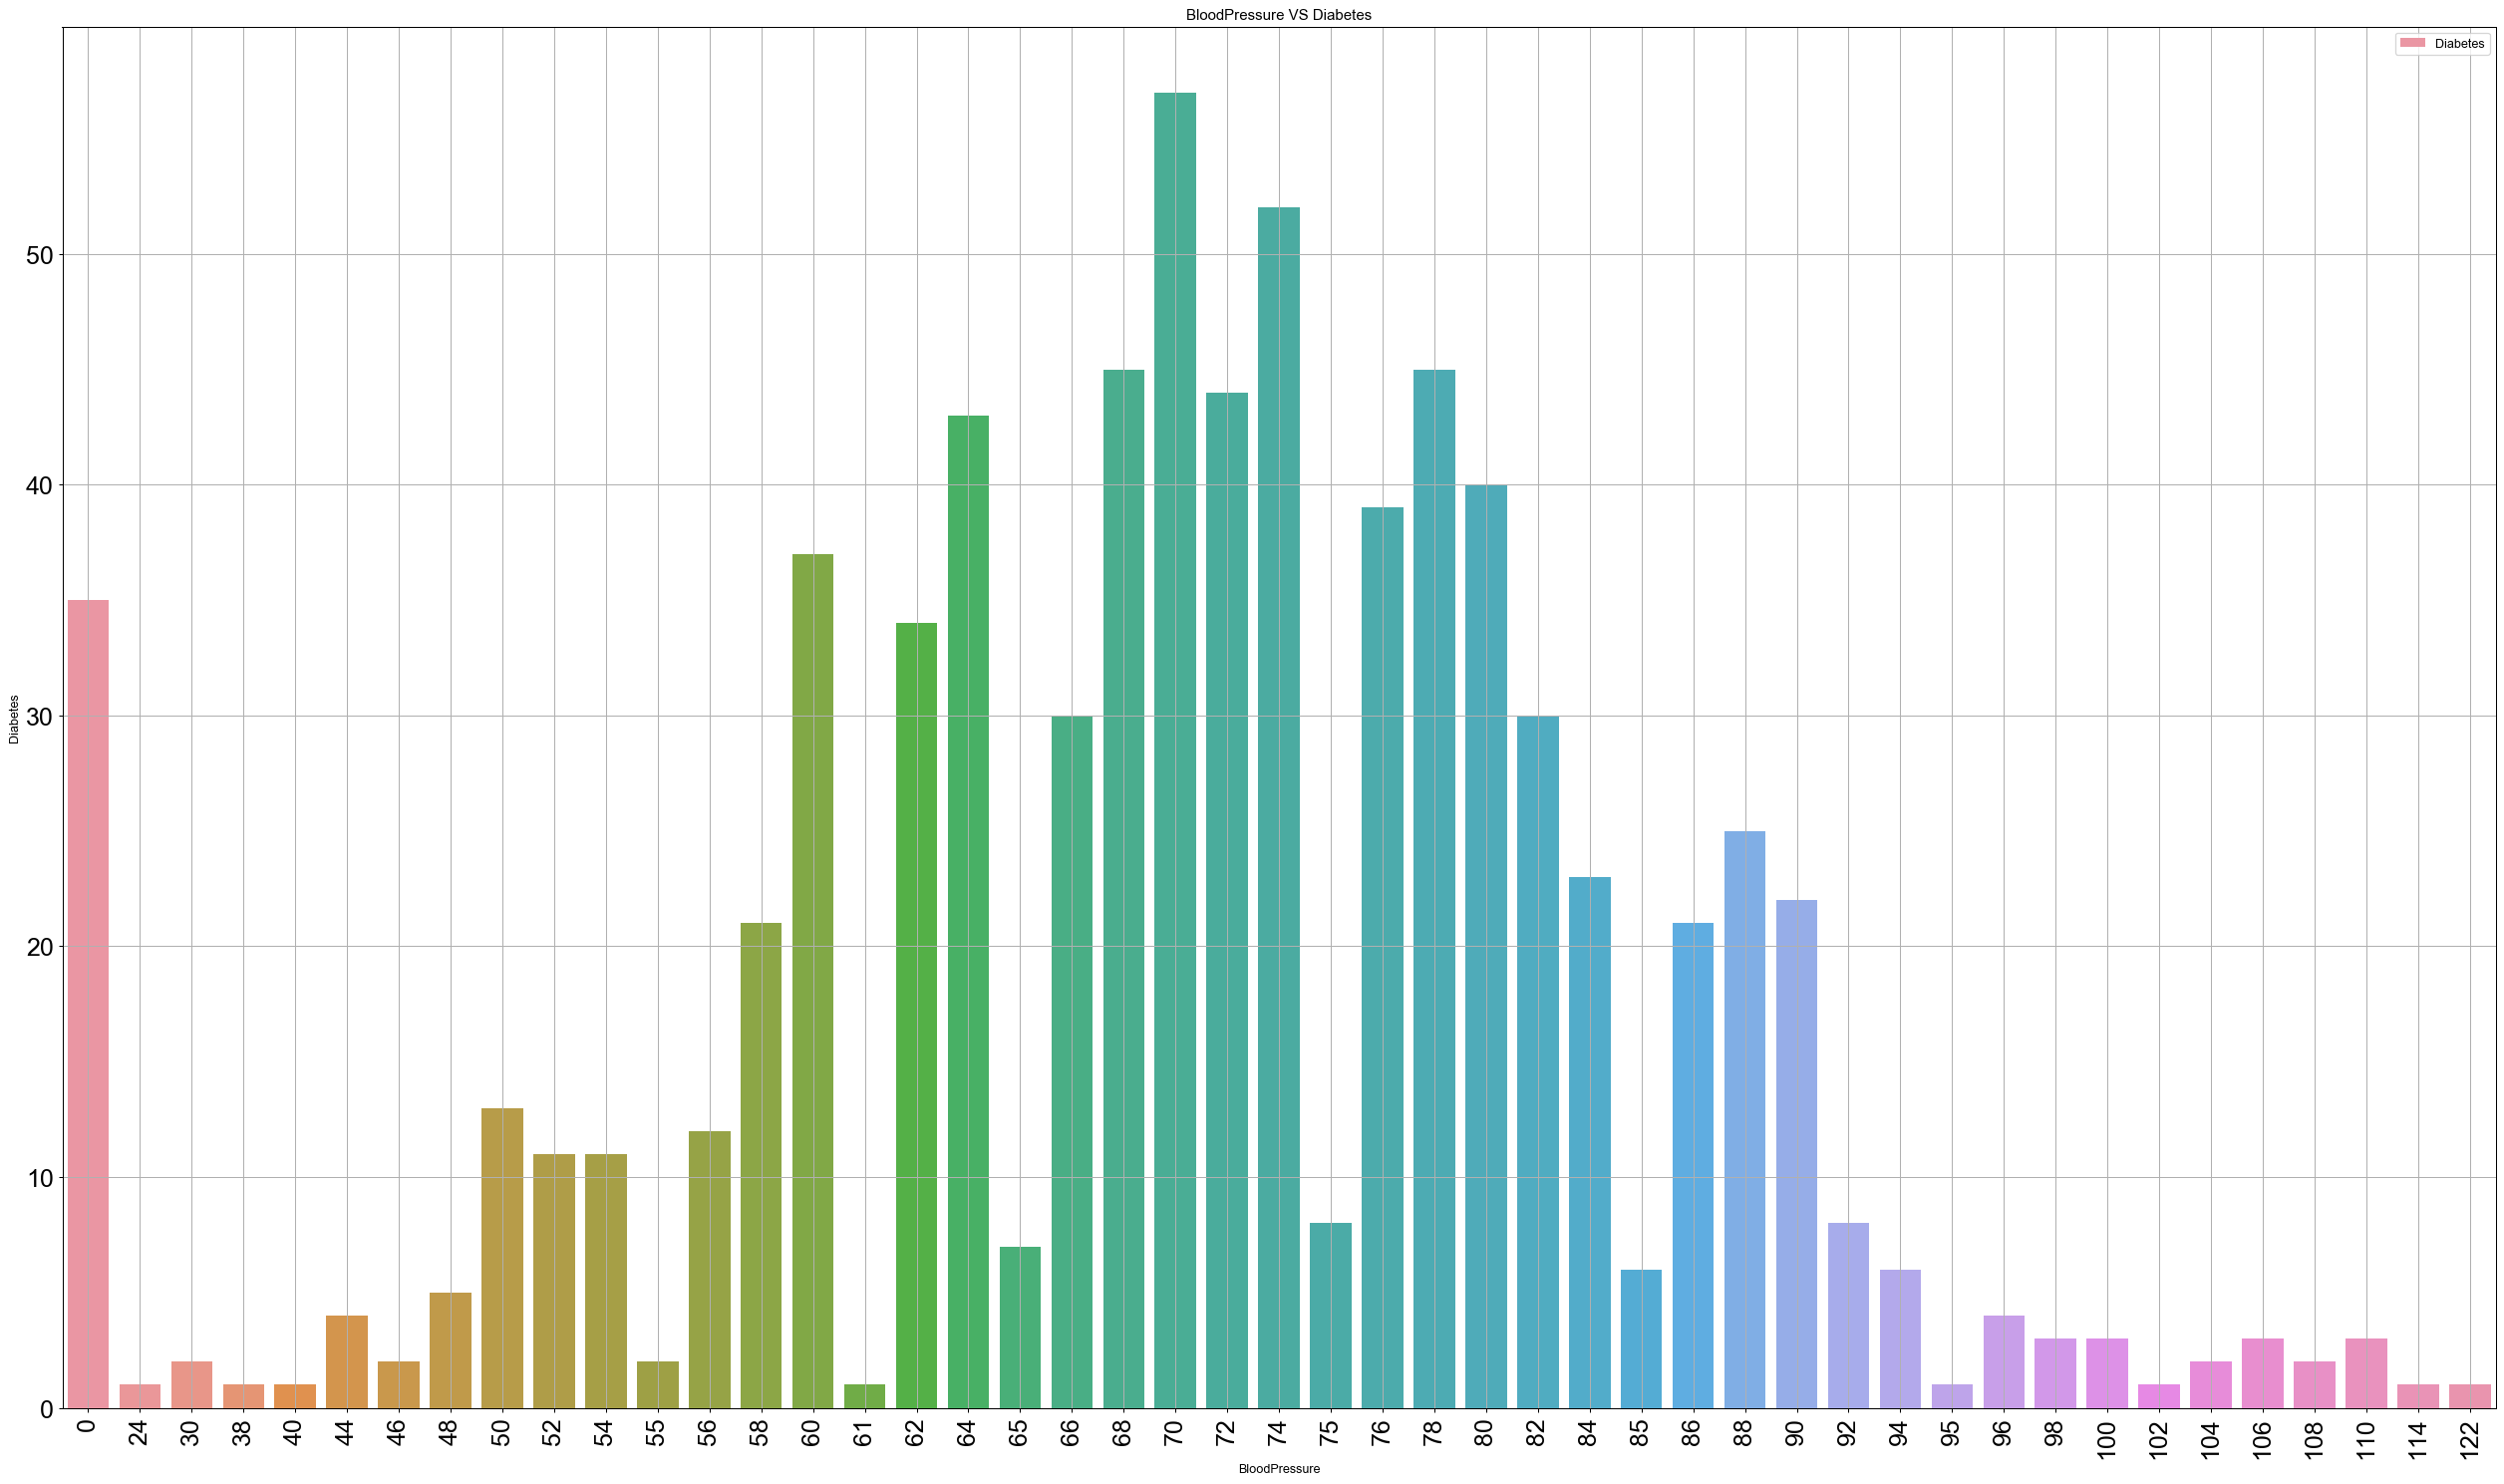

In [17]:
plt.figure (figsize = (35,20) , dpi = 90)
ax = sns.countplot (x  = 'BloodPressure' , data = df)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure')
plt.ylabel ('Diabetes')
plt.legend (['Diabetes'])
plt.title ('BloodPressure VS Diabetes')
plt.grid()
plt.show ()
#结果显示大概也属于正态分布

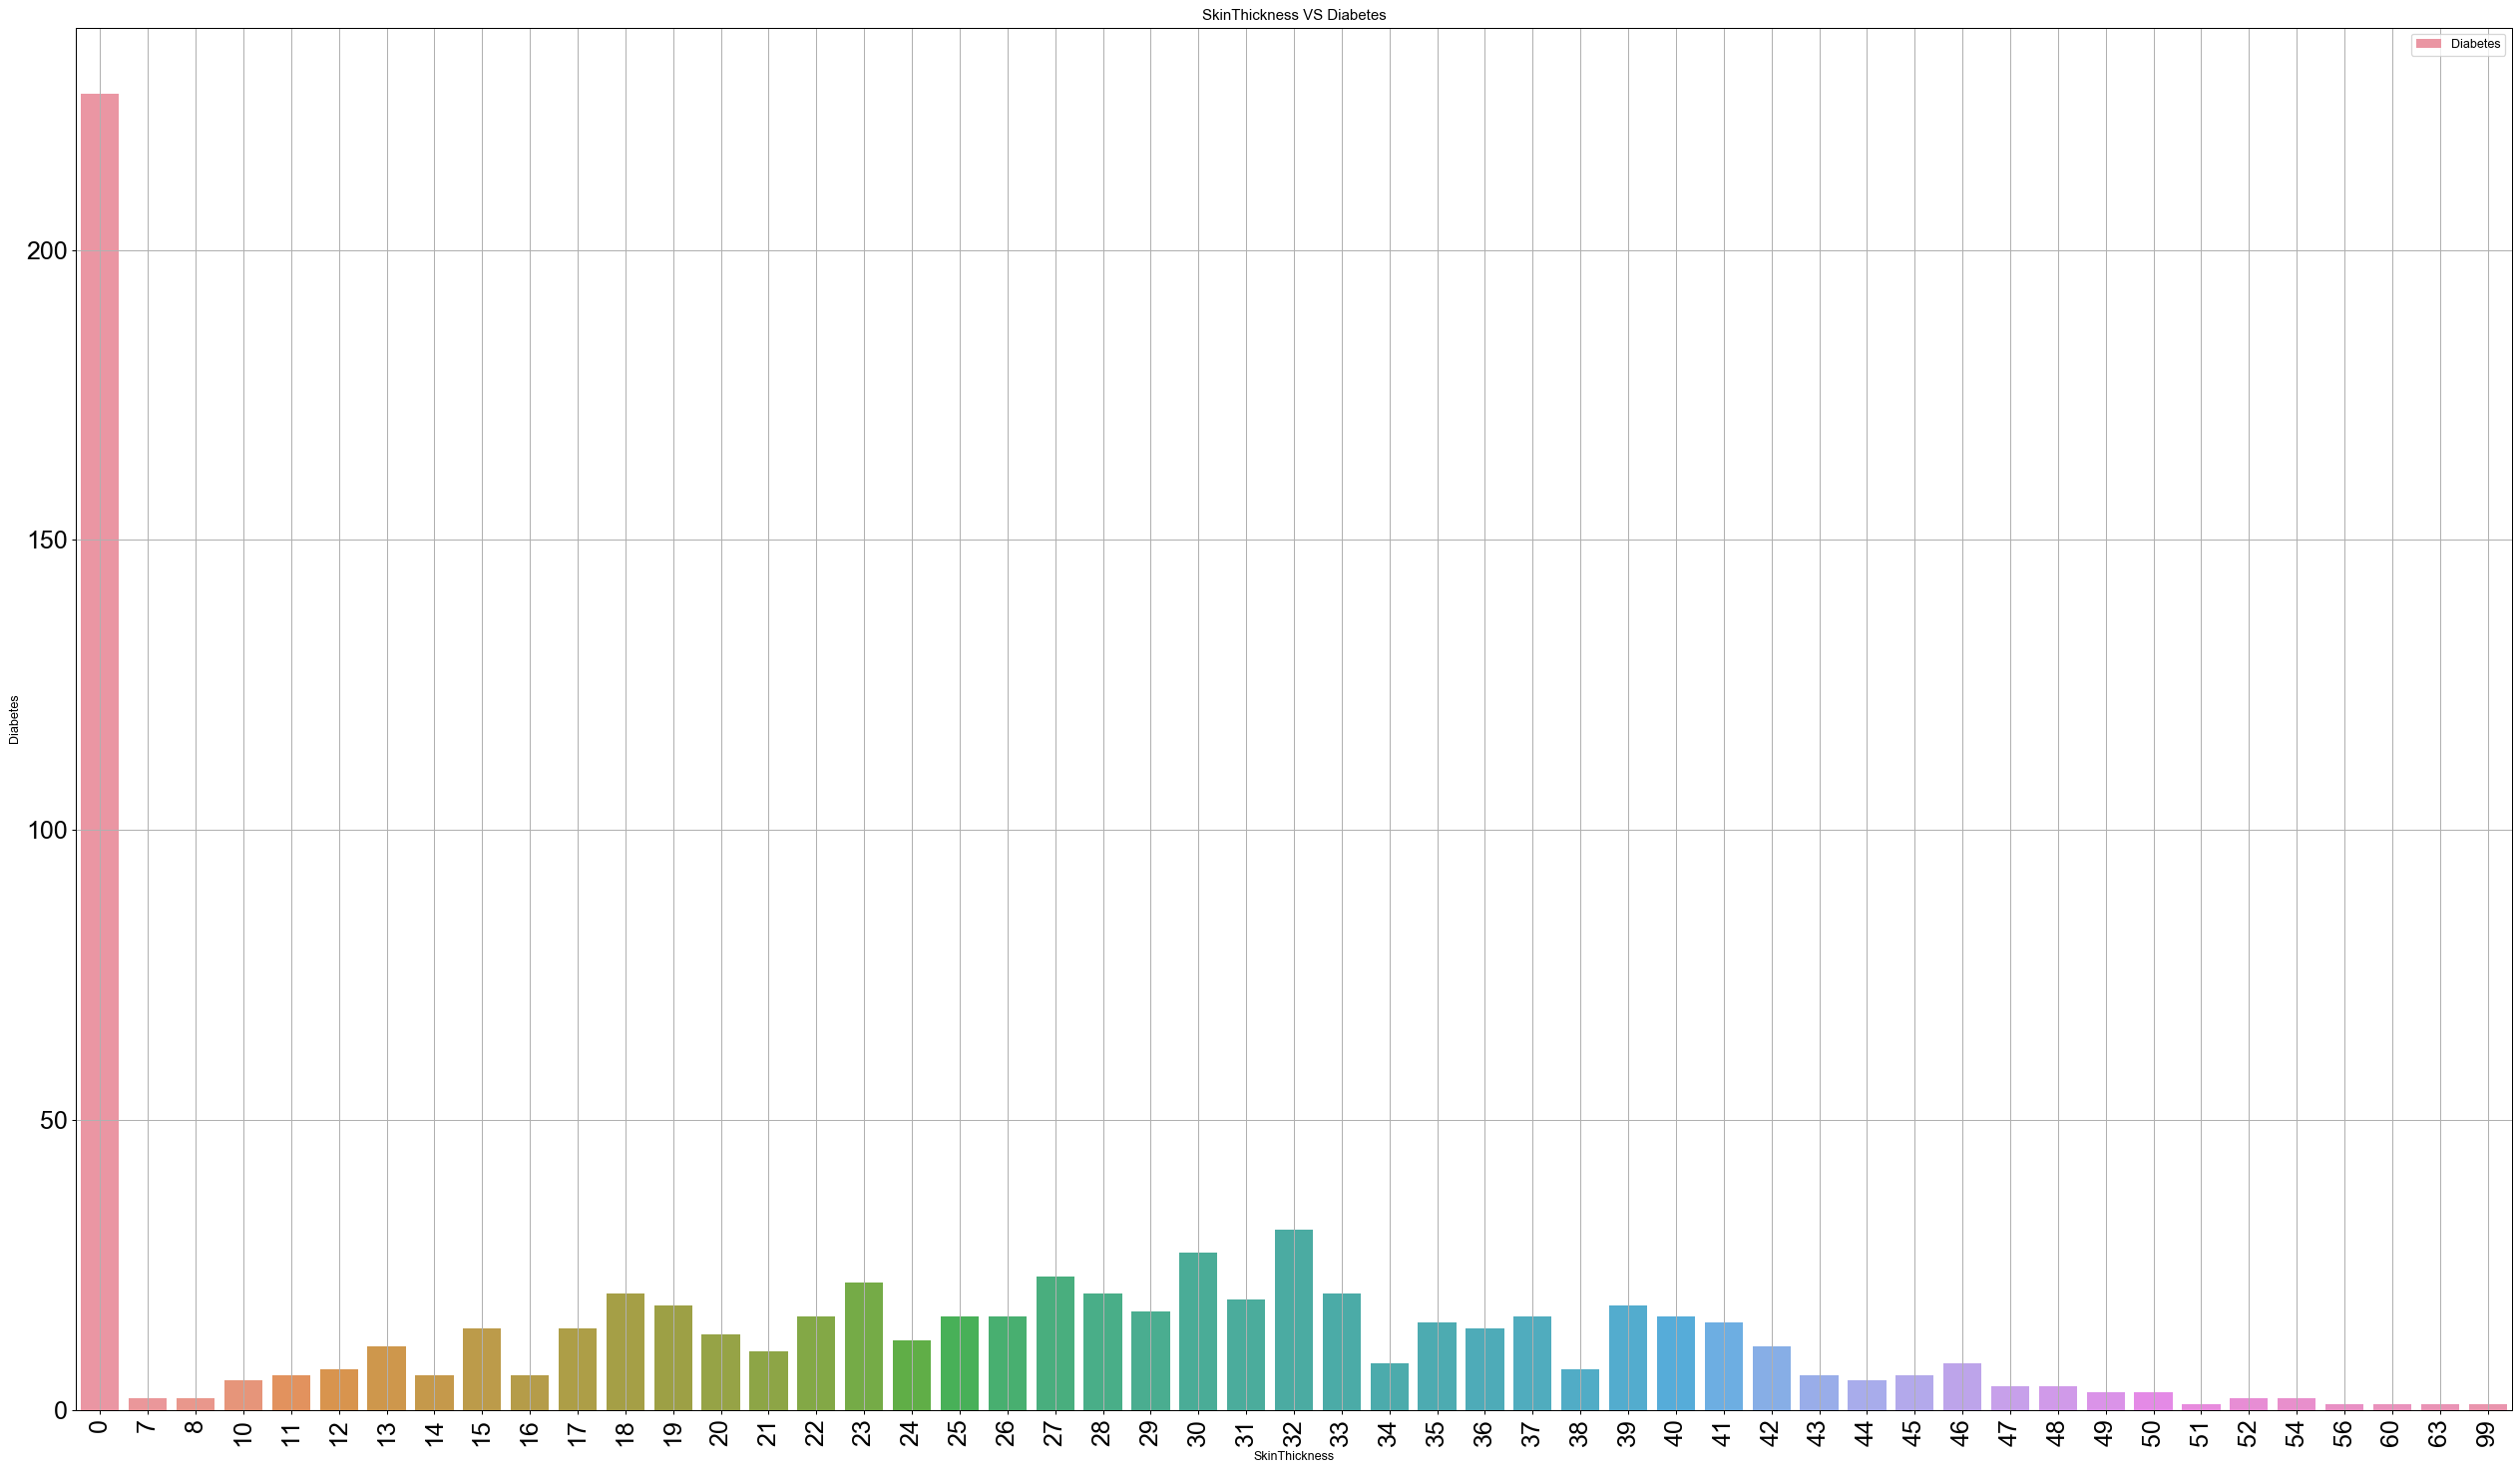

In [18]:
plt.figure (figsize = (35,20) , dpi = 90)
ax = sns.countplot (x  = 'SkinThickness' , data = df)
plt.xticks (rotation = 90 , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('SkinThickness')
plt.ylabel ('Diabetes')
plt.legend (['Diabetes'])
plt.title ('SkinThickness VS Diabetes')
plt.grid()
plt.show ()

In [19]:
df1 = df [df['SkinThickness']>0]
df2 = df1 [df1['SkinThickness']<90]
df2
#提取出皮肤厚度在0和90之间的数据

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [20]:
df3 = df2.dropna (how = 'any')
df3.reset_index (drop = True , inplace = True)
#重置索引，drop为True时直接丢弃原来的索引，否则则将原来的索引生成新的一列名为（index）的列同时会产生一个新的DataFrame
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
535,9,170,74,31,0,44.0,0.403,43,1
536,10,101,76,48,180,32.9,0.171,63,0
537,2,122,70,27,0,36.8,0.340,27,0
538,5,121,72,23,112,26.2,0.245,30,0


In [21]:
x = pd.DataFrame(data,columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values
y = df.Outcome.values.reshape(-1,1)
x
#将数据转化为数组以便更快的计算

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [22]:
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y , random_state = 0,test_size = 0.3 ,stratify = y)
#设置样本占比为0.3，并且使每次划分得到相同的样本集和训练集

In [23]:
clf = KNeighborsClassifier()
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#使用默认参数进行建模测试

Accuracy: 74.89%


In [24]:
k = 3
clf = KNeighborsClassifier(k)
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
#选择3个样本训练模型
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.00%


In [25]:
k = 9
clf = KNeighborsClassifier(k)
clf.fit(x_train ,y_train.ravel())
y_pred = clf.predict(x_test)
#选择9个样本训练模型
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.19%


In [26]:
k = 20
Acc = np.zeros((k))
for i in range(1 ,k+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train ,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test ,y_pred)
Acc
#计算各个K值的准确度并放进数组内

array([0.70562771, 0.74891775, 0.70995671, 0.74458874, 0.74891775,
       0.75324675, 0.75324675, 0.76623377, 0.76190476, 0.74891775,
       0.75324675, 0.74891775, 0.74891775, 0.74891775, 0.74025974,
       0.74458874, 0.73160173, 0.73593074, 0.73160173, 0.74891775])

Best parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Best score: 0.7578125
Accuracy: 76.62%
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       168
           1       0.56      0.71      0.63        63

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.77       231



<Axes: >

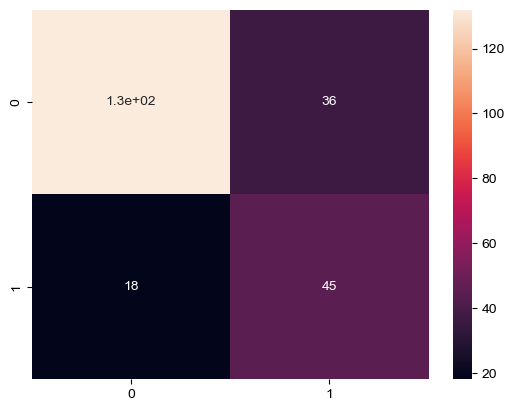

In [27]:
# 定义KNN分类器
knn = KNeighborsClassifier()
# 定义参数空间和搜索范围
array = np.arange(1,21)
param_grid = {'n_neighbors': array, 'weights': ['uniform', 'distance']}
# 定义评估指标和交叉验证折数
scoring = 'accuracy'
cv =3
# 创建GridSearchCV实例
grid = GridSearchCV(knn, param_grid, scoring=scoring, cv=cv)
# 训练模型并选择最佳参数组合
grid.fit(x,y)
# 输出最佳参数组合和性能指标
print('Best parameters:', grid.best_params_)
print('Best score:', grid.best_score_)
# 使用最佳参数组合评估模型
best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'], weights=grid.best_params_['weights'])
best_knn.fit(x_train ,y_train.ravel())
y_pred = best_knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_pred, y_test))
#针对类别不均衡的情况，通过计算其精准度，召回率等来评判模型
#precision:精度=正确预测的个数(TP)/被预测正确的个数(TP+FP),即模型预测结果中多少是预测正确的
#recall:召回率=正确预测的个数(TP)/预测个数(TP+FN),即测试集总量中,有多少样本是预测正确的
#f1-score:F1=2*精度*召回率/(精度+召回率)
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)
#混淆矩阵更能直观看出预测结果
###结果为：测试集中非糖尿病被预测为非糖尿病的有130例，糖尿病被预测为糖尿病的有45例，非糖尿病被预测为糖尿病的有36例，糖尿病被预测为非糖尿病的有18例。

In [28]:
gnb = GaussianNB()
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
#朴素贝叶斯分类

Accuracy: 76.19%


In [29]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       157
           1       0.62      0.68      0.65        74

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



<Axes: >

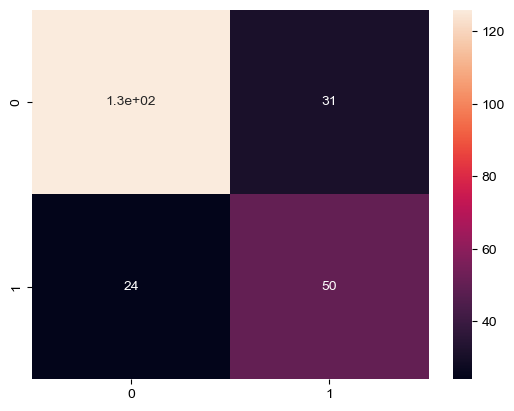

In [30]:
confusion = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(confusion)
sns.heatmap(df_cm, annot=True)

In [31]:
rf = rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.79%


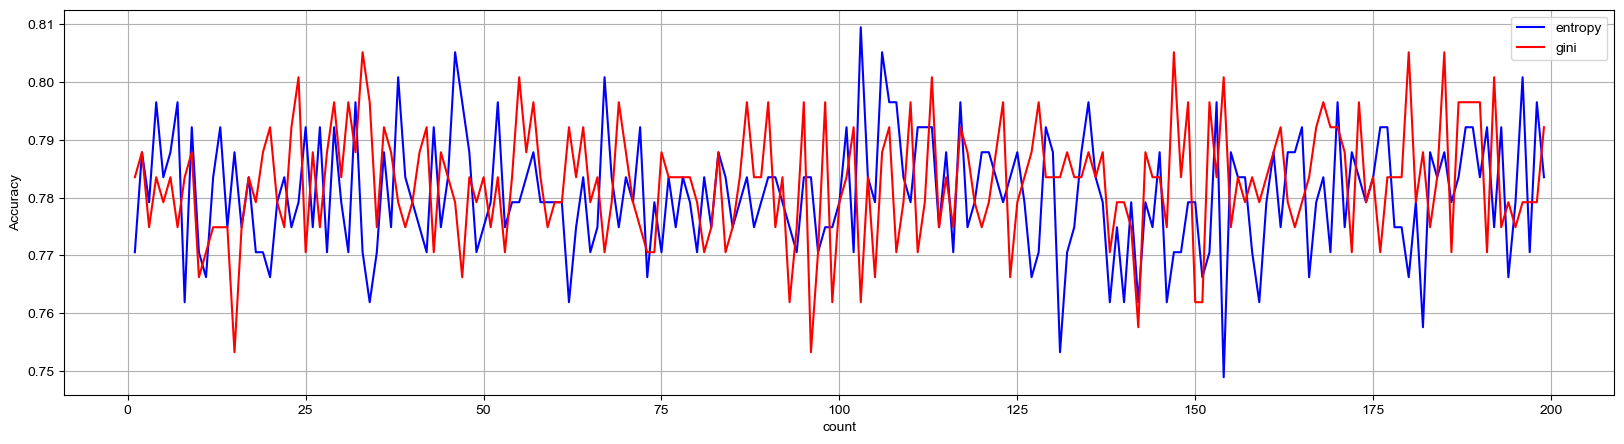

In [32]:
scoreall = []
for i in range(1 ,200):
    rf = rf = RandomForestClassifier(criterion = 'entropy')
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    rf = rf = RandomForestClassifier(criterion = 'gini')
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy2 = accuracy_score(y_test, y_pred)
    scoreall.append([accuracy1 ,accuracy2])
scoreall = np.array(scoreall)
plt.figure(figsize=[20,5])
plt.plot(range(1 ,200),scoreall[:,0],color = 'b' ,label = 'entropy')
plt.plot(range(1 ,200),scoreall[:,1],color = 'r' ,label = 'gini')
plt.xlabel('count')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show () 

In [33]:
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]##这句话看似很长的，其实就是找出最高得分对应的索引
scoreall[max_score]

array([0.77056277, 0.80519481])

最优参数以及最高得分: [35.          0.80519481]


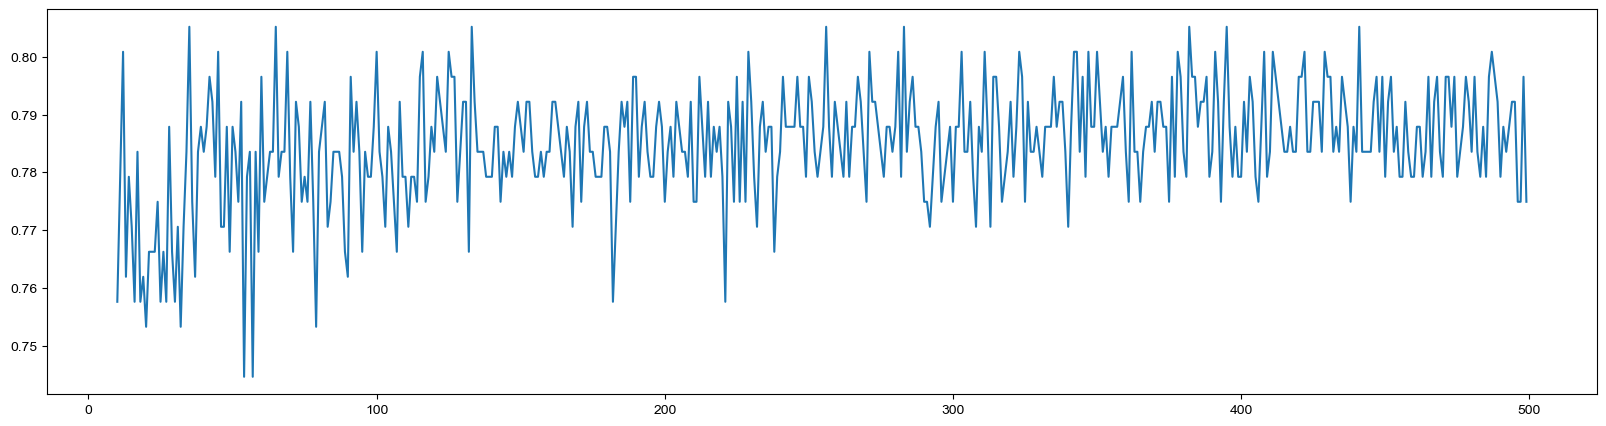

In [34]:
scoreall = []
for i in range(10,500):
    rf = RandomForestClassifier( criterion = 'gini', n_estimators = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [322.           0.80952381]


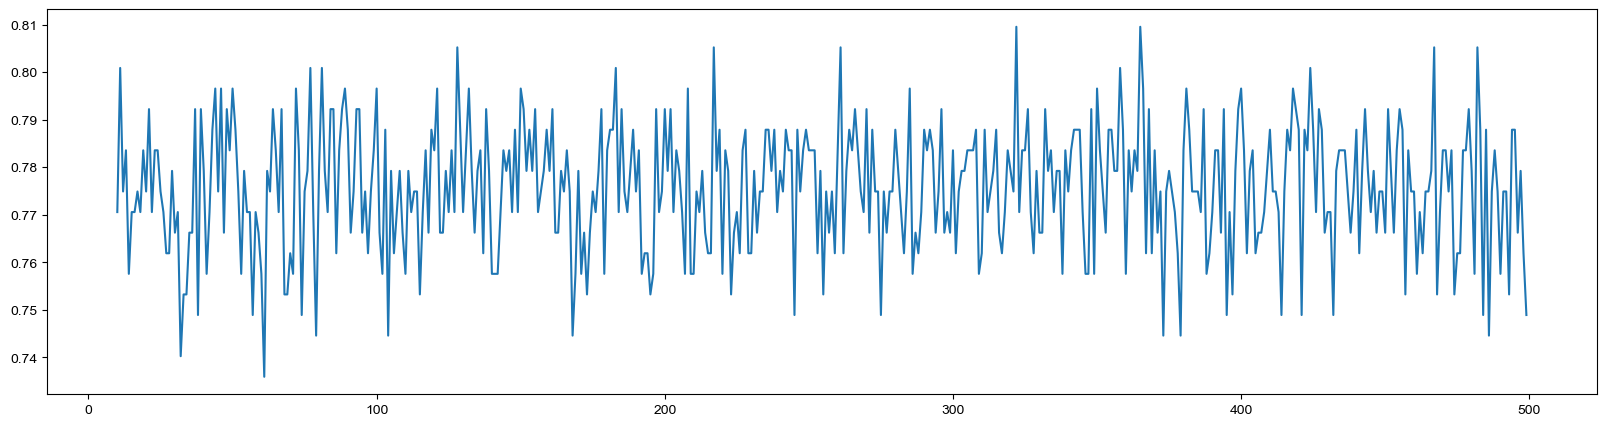

In [35]:
scoreall = []
for i in range(10,500):
    rf = RandomForestClassifier(criterion = 'gini', n_estimators = 35, max_depth = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [7.         0.80519481]


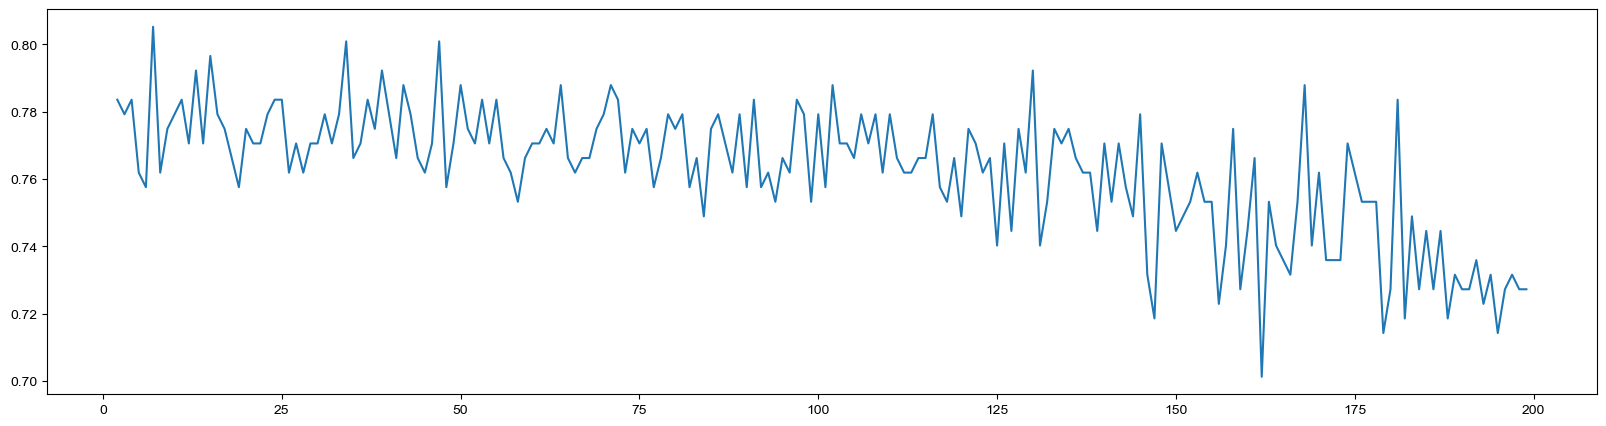

In [36]:
scoreall = []
for i in range(2,200):
    rf = RandomForestClassifier(criterion = 'gini', n_estimators = 35, max_depth = 322, min_samples_split = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [5.        0.7965368]


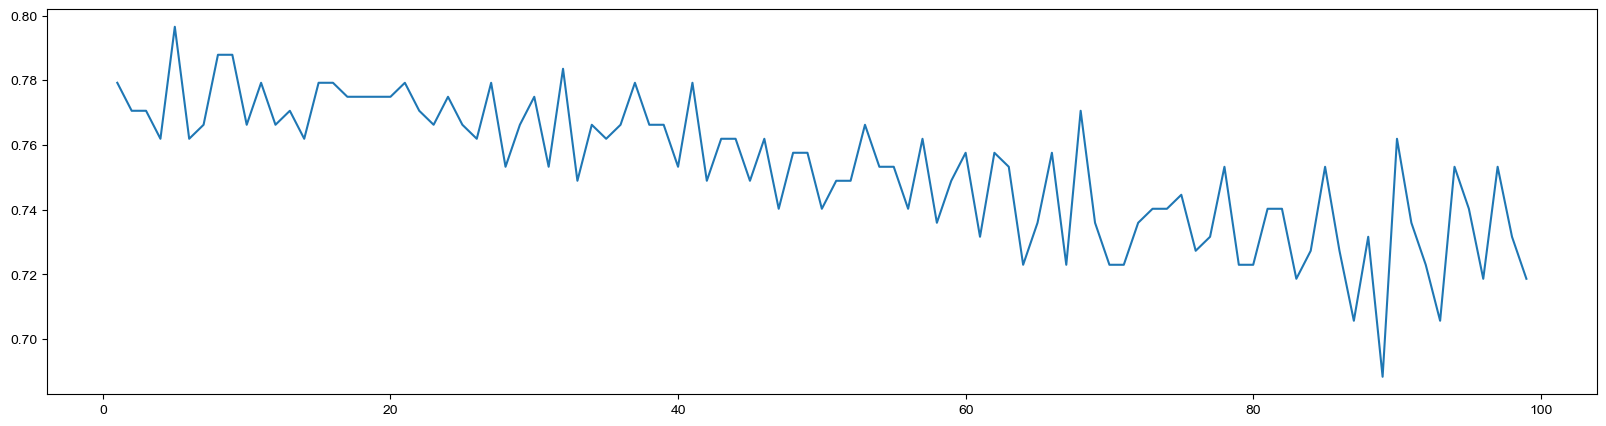

In [37]:
scoreall = []
for i in range(1,100):
    rf = RandomForestClassifier(criterion = 'gini', n_estimators = 35, max_depth = 322, min_samples_split = 7, min_samples_leaf = i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()

最优参数以及最高得分: [455.           0.81385281]


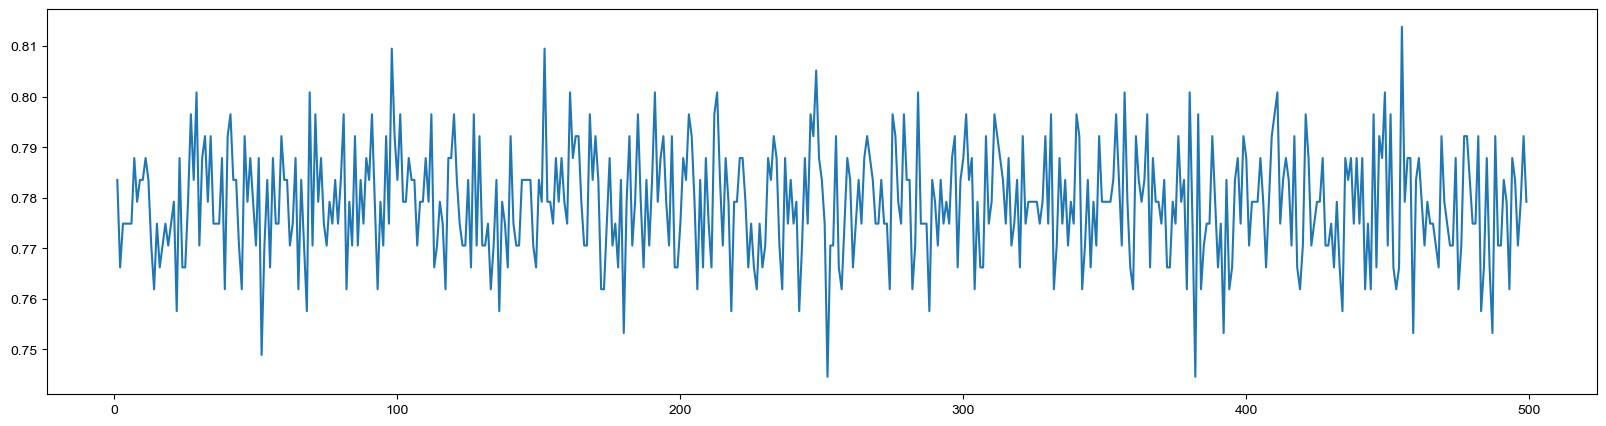

In [41]:
scoreall = []
for i in range(1,500):
    rf = RandomForestClassifier(criterion = 'gini', n_estimators = 35, max_depth = 322, min_samples_split = 7, min_samples_leaf = 5)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreall.append([i ,accuracy])
scoreall = np.array(scoreall)
max_score = np.where(scoreall==np.max(scoreall[:,1]))[0][0]
print("最优参数以及最高得分:",scoreall[max_score])  
plt.figure(figsize=[20,5])
plt.plot(scoreall[:,0],scoreall[:,1])
plt.show()